<a href="https://colab.research.google.com/github/Voidspaceinuniverse/Works/blob/main/PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q torchmetrics

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
from torchvision import transforms
from torchmetrics import MeanAbsoluteError
from torchmetrics import MeanAbsolutePercentageError
from torchmetrics import R2Score

In [ ]:
# Генерация данных
num_points = 20000
x = np.random.uniform(-10, 10, num_points)
y = np.random.uniform(-10, 10, num_points)
z = np.sin(x + 2*y) * np.exp(- (2*x + y)**2)

# Создание датасета
data = np.column_stack((x, y, z))

In [ ]:
X = data[:, :2]
Y = data[:, 2]

X_train_0, X_test, Y_train_0, Y_test = train_test_split(X, Y, test_size = 0.15, random_state = 42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_0, Y_train_0, test_size = 0.17645, random_state = 42)
print(f'DF features {X.shape} = Train {X_train_0.shape} Test {X_test.shape} Train {X_train.shape} Val {X_val.shape}')
print(f'DF target {Y.shape} = Train {Y_train_0.shape} Test {Y_test.shape} Train {Y_train.shape} Val {Y_val.shape}')

x_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(Y_train).view(-1, 1).float()
x_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(Y_test).view(-1, 1).float()
x_val = torch.from_numpy(X_val).float()
y_val = torch.from_numpy(Y_val).view(-1, 1).float()

DF features (20000, 2) = Train (17000, 2) Test (3000, 2) Train (14000, 2) Val (3000, 2)
DF target (20000,) = Train (17000,) Test (3000,) Train (14000,) Val (3000,)


In [ ]:
class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(2, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = RegressionModel()

In [ ]:
mape = MeanAbsolutePercentageError()
r2s = R2Score()

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(x_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()

model.eval()
with torch.no_grad():
    y_pred = model(x_test)
    mse = criterion(y_pred, y_test)
    mape = mape(y_pred, y_test)
    r2s = r2s(y_pred, y_test)
    print("Mean Square Error:", mse.item())
    print("Mape:", mape)
    print("R2:", r2s)

Mean Square Error: 0.017098000273108482
Mape: tensor(7183.3755)
R2: tensor(0.0422)


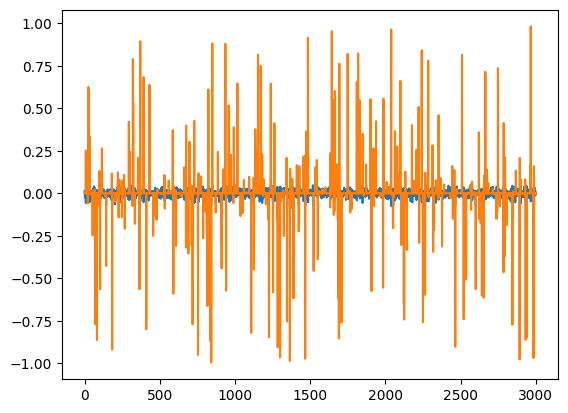

In [ ]:
plt.plot(y_pred)
plt.plot(y_test)
plt.show()